# The Normal Distribution

## Introduction

For data scientists and machine learning professionals, the normal (also referred to as Gaussian) distribution stands out as one of the most commonly used distribution models. This lesson provides an introduction to the normal distribution, its characteristics, and its significance in data science. 

## Objectives
You will be able to:

* Understand the characteristics of a normal Distribution
* Identify examples in the real world that follow a normal distribution
* Explain why the normal distribution is so important to data scientists
* How to generate and visualize normal distributions in Python

## The Normal Distribution
The normal distribution is the most important and most widely used distribution in statistics and data science. It is also called the "bell curve," due to its bell shape, or the "Gaussian curve" after the German mathematician Karl Friedrich Gauss.

Recall our NYC weather distribution. This is a classic example of a normal distribution. The idea is that there is sort of an expectation around what the temperature will be on June 1 (80 degrees Fahrenheit) and that temperatures much lower or much higher are less likely the further they move away from this expected temperature. This type of behavior is present in many phenomenons, as you'll see later.

![](images/histogram_NYC_weather.png)

The normal distribution is **a continuous distribution**. In practice though, you'll see many discrete distributions that follow a bell curve shape:
- The observed values are actually discrete. For example, human IQ follows a normal distribution, but IQ is only specified up to the unit digit level, e.g. an IQ of 90, 91, or 92.
- The values in our distribution are actually continuous (e.g. our temperature example) but recorded up to a certain constant because there is (obviously) no "exact" thermometer that measures temperature up to an infinite amount of digits.

Even though the IQ level is not actually recorded as a continuous variable, you'll see that the distribution is generally represented as a smooth curve!


<img src="images/iq_bell.png" width = "650">

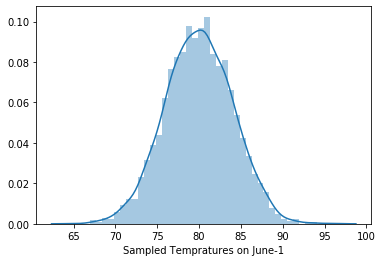

In [6]:
## NYC weather on June - 1 with python
## Here we will use numpy to generate the sample

import numpy as np 

import seaborn as sns
%matplotlib inline

np.random.seed(1905)

nyc_temp =np.random.normal(loc = 80, scale = 4, size =365 * 10)

sns.distplot(nyc_temp, axlabel = 'Sampled Tempratures on June-1', );

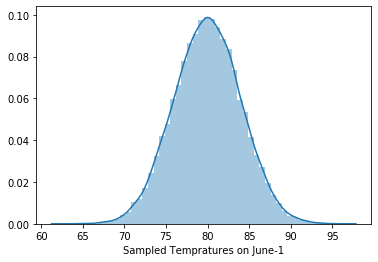

In [10]:
## we could use scipy to generate similar sample
import scipy

nyc_temp2 = scipy.stats.norm.rvs(loc=80, scale=4, size = 365 * 100, random_state = 1905)
sns.distplot(nyc_temp2, axlabel = 'Sampled Tempratures on June-1', );

In [11]:
## note that for normal distributions mean = median = mode
print('mean: {}, var: {}, median: {}, mode: {}'.format(nyc_temp.mean(),
                                                       nyc_temp.var(),
                                                       np.median(nyc_temp),
                                                       scipy.stats.mode(nyc_temp)[0]))

mean: 79.9718281733511, var: 16.179967631283084, median: 79.99705265665109, mode: [64.83719829]


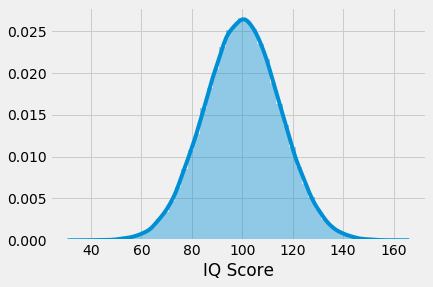

In [32]:
## Let's write a similar code for IQ scores

IQ = scipy.stats.norm.rvs(loc=100, scale=15, size = 100000, random_state = 1905)
sns.distplot(IQ, axlabel = 'IQ Score', );
# your code is here

####

In [33]:
print(f'mean: {IQ.mean()}, var: {IQ.var()}, median: {np.median(IQ)}, mode: {scipy.stats.mode(IQ)[0]}')

mean: 100.00208236021054, var: 226.61307277752303, median: 100.04513192823165, mode: [35.44478013]


## The Probability Density Function

The density function equation is given by the following expression:

$$ \large N(x) = \dfrac{1}{\sigma \sqrt {2\pi }}e^{-\dfrac{(x-\mu)^2}{2\sigma^2}}$$

Here, 
- $\mu$ is the mean
- $\sigma$ is the standard deviation
- $\pi \approx 3.14159 $ 
- $ e \approx 2.71828 $

Don't worry if your head is spinning right now. Don't worry about the formula, what you really need to remember is that:
- A normal distribution has 2 key parameters, $\mu$ and $\sigma$, which define the mean and the spread of the distribution, respectively.

- If you apply our formulas of expected values and variance seen in the PDF lesson before, where $X \sim N(x)$:
    - $ E(X) = \int_{- \infty}^{+ \infty} p(x)x dx = \mu $
    - $ \text{Var}(X) = E((X-\mu)^2) = \int_{- \infty}^{+ \infty} p(x)(x-\mu)^2 dx = \sigma^2$
    
  where $\mu$ and $\sigma$ are as specified in the formula of $N(x)$



## Mean and Standard Deviation

Here is a first simple definition for normal distributions:

> **The Normal Distribution is symmetrical and its mean, median and mode are equal.**

A normal distribution is **centered around its mean**, so the distribution is not skewed (you'll learn more about skewness later).  This doesn't mean that normal distributions cannot appear in different shapes and forms. How exactly the distribution behaves depends on the 2 key parameters, as specified before: the **mean** and the **standard deviation**.

<img src="images/normal_plt.png" width ="750">

This figure shows four normal distributions. 

* The green distribution has a mean of 0 and a standard deviation of 0.4 
* The distribution in blue has a mean of 0 and a standard deviation of 1.
* The distribution in red has a mean of 0 and a high spread with standard deviation of 3. 
* The orange distribution has a mean of 2 and a standard deviation of 0.5.

All these distributions have the following properties in common:
- They are symmetric,
- They have relatively higher densities of values at the center of the distribution and relatively lower density in the tails

The CDFs of these distributions are shown below:


<img src="images/cumul_normal_plt.png" width="750">

In [25]:
import matplotlib.style as style
style.use('fivethirtyeight')

In [26]:
## let's create two normal distribution with mu = 0  and sigma = 1,2

n01 = scipy.stats.norm.rvs(loc=0, scale =1, size = 1000)
n04 = scipy.stats.norm.rvs(loc=0, scale =2, size = 1000)

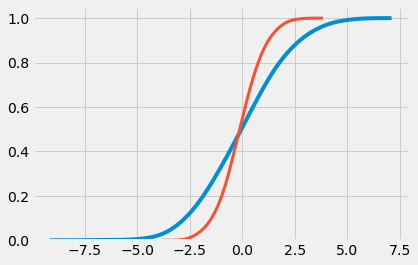

In [27]:
## we will use seaborn to plot cumulative distribution functions
sns.distplot(n04,hist =False,
            hist_kws=dict(cumulative=True),
            kde_kws=dict(cumulative=True));

sns.distplot(n01, hist = False,
            hist_kws=dict(cumulative=True),
            kde_kws= {'cumulative':True, 'linewidth': 3});

## Some More Characteristics of the Normal Distribution

Let's summarize the key characteristics of the normal distribution below:

* Normal distributions are symmetric around their mean
* The mean, median, and mode of a normal distribution are equal
* The area under the bell curve is equal to 1.0 (__Any probability distribution has this property !!__)
* Normal distributions are denser in the center and less dense in the tails
* Normal distributions are defined by two parameters, the mean ($\mu$) and the standard deviation ($\sigma$).
* Around 68% of the area of a normal distribution is within _one standard deviation_ of the mean 
($(\mu-\sigma)$ to $(\mu + \sigma)$)
* Approximately 95% of the area of a normal distribution is within two standard deviations of the mean ($(\mu-2\sigma)$ to $(\mu + 2\sigma)$).


Let's look at the image below to get a better sense of the two last statements. In this image, the spread is differentiated between levels of deviation.

<img src="images/normal_sd_new.png" width ="750">

This forms a 68-95-99.7 rule, i.e., 68% values of a normal distribution are within 1 standard deviation of the mean, 95% within 2 standard deviations and 99.7 % within 3 standard deviations. So normally distributed data is considered ideal for analysis due to this simplicity of description. Values in the extreme of tails (more than 3 standard deviations) can be considered "interesting events" as their probability of occurrence is very low (1 occurrence in about ~300!). In other cases, you'll consider them as outliers due to noise or error of measurement. It all depends on your analysis question. 

Keeping this in mind, have another look at the IQ distribution and identify "extreme events" in terms of IQ!

## Why So Popular?

In this section, you'll learn about some reasons why normal distributions are so popular among data scientists:

### Ubiquitous in Natural Phenomena

An amazingly vast number of natural processes naturally follow the normal distribution. A simple normal distribution gives the best model approximation for natural processes like weight, height, blood pressure, etc. Errors committed during some measurements are also found to be normally distributed so they can be modeled and isolated with ease. The income, expenditure and other social attributes of masses are often normally distributed as well.

### Central Limit Theorem

The Central Limit Theorem states: 
>When you add **a large number** of independent random variables, irrespective of the original distribution of these variables, **their mean tends towards a normal distribution**.

**More explicitly: If random samples of size n are taken from any distribution with mean $\mu$ and variance $\sigma^{2}$, the sample mean $\bar{Y}$ will have a distribution approximately normal with mean $\mu$ and variance $\frac{\sigma^{2}}{n}$. The approximation becomes better as n increases.**

The theorem provides a reason why many natural phenomena follow a normal distribution.

The key takeaway from the central limit theorem is that it allows different distributions to be processed as a normal distribution, even when they do not fulfill the normality requirements shown above. We'll discuss this further when we talk about hypothesis testing 

[Here is an interesting youtube video highlighting this phenomenon](https://www.youtube.com/watch?v=AUSKTk9ENzg) for now. We will consider this in detail later. 

In [8]:
# avg = []

# for i in range(1,1000,200):
#     binomial = scipy.stats.multinomial.rvs(n = 2, p = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6], size = 1)
#     sum_of_dice = np.mean(np.dot(binomial, [1,2,3,4,5,6]))
#     avg.append(sum_of_dice)
#     sns.distplot(avg, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'size {}'.format(i))

The density function of a normal distribution can also be plotted using a matplotlib _line plot_ and using the formula given above. You'll try to do this in the next lab.

## Summary 

This lesson provides an introduction to normal distributions, the most common distribution family in the field of statistics and data analysis. You learned about the key characteristics of normal distributions, their density function based on mean and standard deviations, and briefly discussed the reasons behind their ubiquitous nature. 